In [1]:
import pandas as pd 
import numpy as np
import re

# Visualisation libraries
import seaborn as sns

import missingno as msno #For missing value visualization
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

# From here: https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm
import plotly.offline as py
py.init_notebook_mode(connected=True)

# string utility
import string

# main nlp library and modell
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import time

# Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score


# Modelling Purpose
# Regression model
from sklearn.linear_model import LogisticRegression

# Ensemble model
from sklearn.tree import DecisionTreeClassifier

# Essentially, Random Forest is a group of decision trees
from sklearn.ensemble import RandomForestClassifier

# 

# Support Vector Classifier, based on SVMs (Support Vector Machines)
from sklearn.svm import SVC

# https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# Random classification, ignoring inputs
from sklearn.dummy import DummyClassifier

## K-nearest neighbor classifieer
from sklearn.neighbors import KNeighborsClassifier

## SGDClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
## data Exploration
ibrahim_data = pd.read_csv(r"data\ibrahim.csv", sep=";")
florina_data = pd.read_csv(r"data\florina.csv", sep=";")
mohamed_data = pd.read_csv(r"data\mohamed.csv", sep=";")

dataset = pd.concat([ibrahim_data, florina_data, mohamed_data])

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8528 entries, 0 to 2802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column1       5725 non-null   float64
 1   Unnamed: 0    8528 non-null   int64  
 2   date          8528 non-null   object 
 3   news          8528 non-null   object 
 4   label         7197 non-null   float64
 5   Unnamed: 0.1  2803 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 466.4+ KB


In [5]:
dataset.head()

,Column1,Unnamed: 0,date,news,label,Unnamed: 0.1
0,2869.0,2869,07.11.22,"As the temperatures in the UK soar, don’t for...",1.0,NaN
1,2870.0,2870,07.11.22,But we won't see the future. It could be anyt...,0.0,NaN
2,2871.0,2871,07.11.22,Can you just make sure the Tesla paint doesn’...,-1.0,NaN
3,2872.0,2872,07.11.22,"He taught himself computer programming at 10,...",1.0,NaN
4,2873.0,2873,07.11.22,Because an old tech thinking. Gas cars have a...,1.0,NaN


In [6]:
## data cleaning
dataset = dataset[["news", "label"]]
dataset.head()

,news,label
0,"As the temperatures in the UK soar, don’t for...",1.0
1,But we won't see the future. It could be anyt...,0.0
2,Can you just make sure the Tesla paint doesn’...,-1.0
3,"He taught himself computer programming at 10,...",1.0
4,Because an old tech thinking. Gas cars have a...,1.0


<AxesSubplot:>

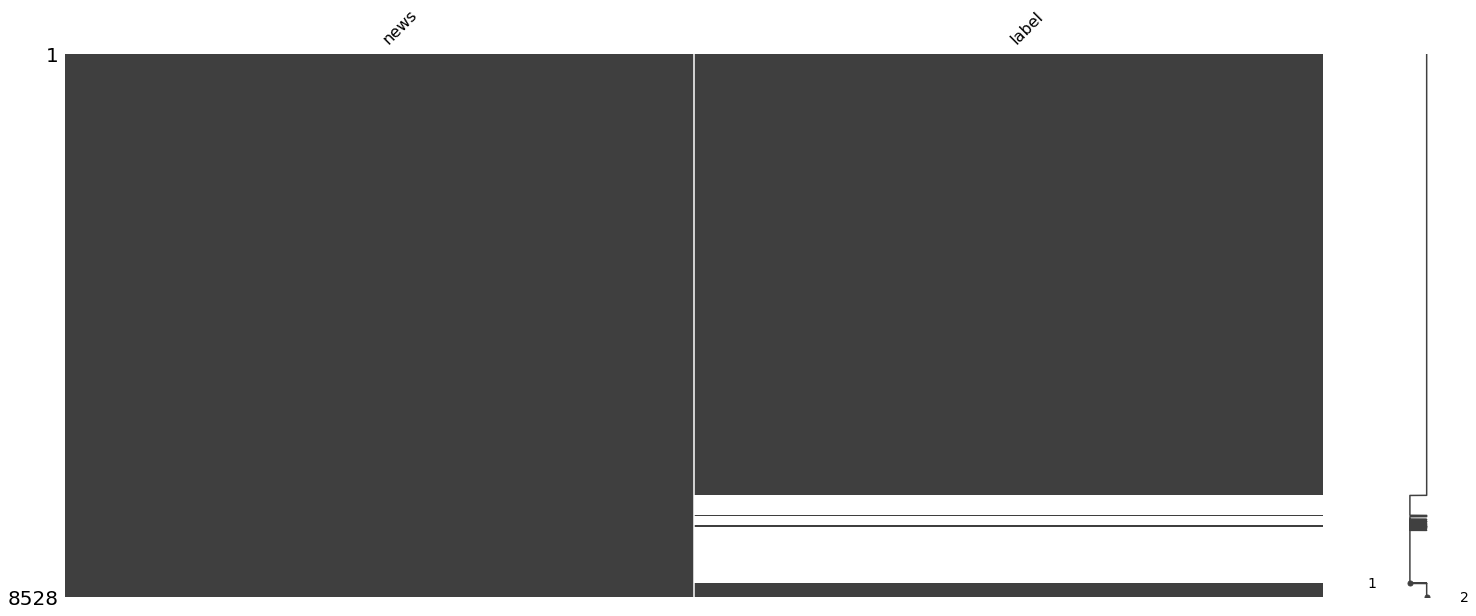

In [7]:
## null value 
msno.matrix(dataset)

In [8]:
## drop rows with null label
dataset = dataset[dataset['label'].notna()]

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   news    7197 non-null   object 
 1   label   7197 non-null   float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [10]:
#cleaning unecessary text from the string 
def clean(text):
    # cleanup 
    #text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    #text = re.sub('\n', ' ',text) #removal of new line characters
    #text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    
    # tokenize and analyze text
    doc = nlp(str(text))
    
    # concatenate tokens that are not stopwords and only alphabethic letters
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    cleaned_text = " ".join(tokens) if len(tokens)>0 else None

    return cleaned_text

In [11]:
dataset['news'] = dataset['news'].apply(clean)

In [12]:
dataset.head()

,news,label
0,temperature UK soar forget use Tesla Dog mode ...,1.0
1,will future earth exist alien help crazy thing...,0.0
2,sure Tesla paint deteriorate Tesla S paint lit...,-1.0
3,teach computer programming create game old cre...,1.0
4,old tech thinking gas car tiny battery need re...,1.0


<AxesSubplot:>

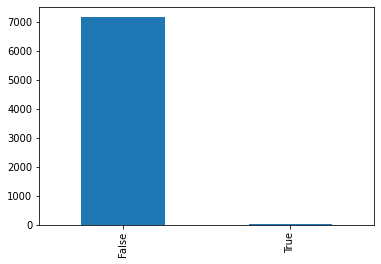

In [13]:
dataset["news"].isna().value_counts().plot(kind="bar")

In [14]:
dataset.dropna(inplace=True)

<AxesSubplot:>

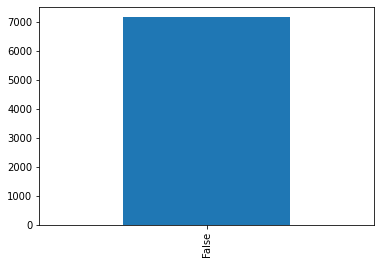

In [15]:
dataset["news"].isna().value_counts().plot(kind="bar")

In [16]:
# store cleaned data
dataset.to_csv("data\cleaned_data.csv", index=False)

In [17]:
# load cleaned data
data = pd.read_csv("data\cleaned_data.csv")
print(f"Rows with empy columns: {data.isna().sum()}")

Rows with empy columns: news     0
label    0
dtype: int64


In [18]:
data['label'].value_counts()

 0.0    4028
 1.0    1611
-1.0    1526
Name: label, dtype: int64

In [19]:
genre_df = pd.DataFrame({'label':['neutral', 'positiv', 'negativ'],'count':[3100, 1736, 1717]})
fig = px.histogram(genre_df,x = 'label',y = 'count',color = 'label')
fig.show()

In [20]:
def print_word_cloud(label,news):
    print(label)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(news)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(label):
    news_str = ""
    for row_index,row in data[data['label']==label].iterrows():
        news_str += " " + str(row['news'])
    return news_str

1.0


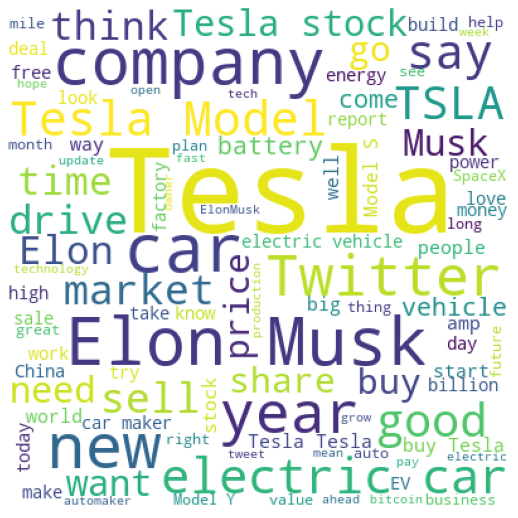

0.0


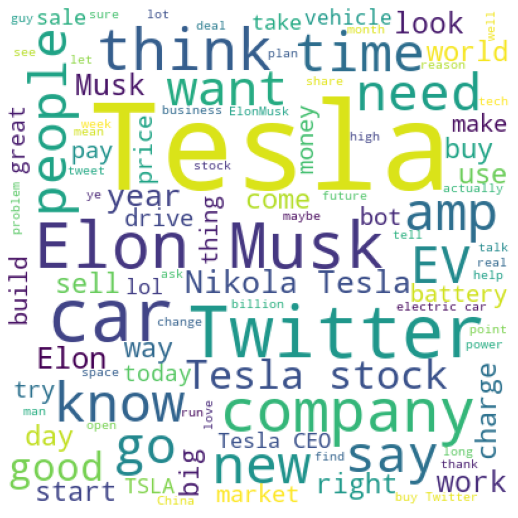

-1.0


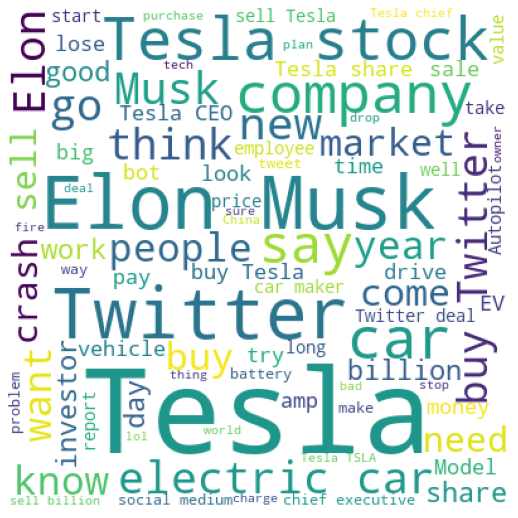

In [21]:
labels = data["label"].unique().tolist()
for l in labels:
    news_string = make_string(l)
    print_word_cloud(l, news_string)

In [22]:
## modelling

#Converting all the categorical features of 'label' to numerical
data['label'] = LabelEncoder().fit_transform(data['label'])
data.head()

,news,label
0,temperature UK soar forget use Tesla Dog mode ...,2
1,will future earth exist alien help crazy thing...,1
2,sure Tesla paint deteriorate Tesla S paint lit...,0
3,teach computer programming create game old cre...,2
4,old tech thinking gas car tiny battery need re...,2


In [23]:
X = CountVectorizer().fit_transform(data['news'].apply(lambda x: str(x)))
y = data['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
models = [MultinomialNB(),LogisticRegression(),RandomForestClassifier(),SVC(),DummyClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(), SGDClassifier()]

In [26]:
## without using onevsrest
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

MultinomialNB Successfully Trained


C:\Users\moham\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
SVC Successfully Trained
DummyClassifier Successfully Trained


C:\Users\moham\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



DecisionTreeClassifier Successfully Trained
KNeighborsClassifier Successfully Trained
SGDClassifier Successfully Trained


In [27]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Precision,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,MultinomialNB,0.563154,0.463128,0.463128,0.471590,0.003555
1,LogisticRegression,0.586881,0.482774,0.482774,0.491936,0.696741
2,RandomForestClassifier,0.572924,0.474410,0.474410,0.481685,14.720646
3,SVC,0.602931,0.435076,0.435076,0.428423,6.575187
4,DummyClassifier,0.548500,0.333333,0.333333,0.236142,0.001031
5,DecisionTreeClassifier,0.501745,0.448858,0.448858,0.448166,0.837126
6,KNeighborsClassifier,0.519888,0.453639,0.453639,0.450955,0.282461
7,SGDClassifier,0.553385,0.475511,0.475511,0.479192,0.083647


In [28]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [29]:
model_df.sort_values(by = 'Time Taken',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Time Taken", title='Time Taken VS Model')
fig.show()